# Proyek Analisis Data: Bike Sharing
- **Nama:** Ramdhautari Retno Widuri Putri Nugraha
- **Email:** widurii40@gmail.com
- **ID Dicoding:** r3tn0_w

## Menentukan Pertanyaan Bisnis

- Pada musim apa (musim semi, panas, gugur, atau dingin) sewa sepeda mencapai angka tertinggi pada tahun 2011 - 2012, berdasarkan data sewa sepeda yang tercatat?
- Pada bulan apa jumlah sepeda yang disewa mencapai angka tertinggi berdasarkan data sewa sepeda selama tahun 2011 - 2012?
- Pada jam berapa jumlah sepeda yang disewa mencapai angka tertinggi dalam sehari, berdasarkan data sewa sepeda selama tahun 2011 - 2012?

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Data `day.csv`

In [95]:
day_df = pd.read_csv("https://raw.githubusercontent.com/forkfrog-rtn/submission/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Data `hours.csv`

In [96]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/forkfrog-rtn/submission/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data `day_df`

Mengecek info detail data

In [97]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek nilai NaN

In [98]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengecek nilai duplikat

In [99]:
day_df.duplicated().sum()

np.int64(0)

Mengecek nilai unik

In [100]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


Mengecek detail penting pada data (nilai minimum, maximum, hingga rata-rata)

In [101]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengecek Nilai Minimum dan Maximum dari `temp`

In [102]:
day_df[day_df.temp == day_df.temp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
553,554,2012-07-07,3,1,7,0,6,0,1,0.861667,0.804913,0.492083,0.163554,1448,3392,4840


In [103]:
day_df[day_df.temp == day_df.temp.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,22,2011-01-22,1,0,1,0,6,0,1,0.05913,0.07907,0.4,0.17197,93,888,981


Mengecek Nilai Minimum dan Maximum dari `atemp`

In [104]:
day_df[day_df.atemp == day_df.atemp.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
202,203,2011-07-22,3,0,7,0,5,1,1,0.848333,0.840896,0.580417,0.1331,562,2825,3387


In [105]:
day_df[day_df.atemp == day_df.atemp.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
21,22,2011-01-22,1,0,1,0,6,0,1,0.05913,0.07907,0.4,0.17197,93,888,981


**Insight:**
- Terdapat tipe data yang salah pada dteday
- Suhu pada temp dan atemp di belakang nol koma (0,...), terlalu tinggi karena skala suhu tidak celcius, dan tipe data yang salah
- Value pada humidity dan windspeed tidak boleh di belakang koma
- Mengubah value pada season

#### Data `hour_df`

Mengecek Tipe Data

In [106]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek Nilai NaN

In [107]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengecek Data Duplikat

In [108]:
hour_df.duplicated().sum()

np.int64(0)

Mengecek Nilai Unik

In [109]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


Mengecek detail penting pada data (nilai minimum, maximum, hingga rata-rata)

In [110]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengecek Nilai Minimum dan Maximum dari `temp`

In [111]:
hour_df[hour_df.temp == hour_df.temp.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13163,13164,2012-07-07,3,1,7,16,0,6,0,1,1.0,0.8636,0.19,0.1642,102,192,294


In [112]:
hour_df[hour_df.temp == hour_df.temp.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
484,485,2011-01-22,1,0,1,6,0,6,0,2,0.02,0.0303,0.44,0.2239,0,2,2
485,486,2011-01-22,1,0,1,7,0,6,0,1,0.02,0.0152,0.44,0.2836,0,8,8
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0000,0.44,0.3284,1,26,27
504,505,2011-01-23,1,0,1,2,0,0,0,1,0.02,0.0606,0.62,0.1343,3,15,18
505,506,2011-01-23,1,0,1,3,0,0,0,1,0.02,0.0606,0.62,0.1343,1,4,5
528,529,2011-01-24,1,0,1,4,0,1,1,1,0.02,0.0606,0.48,0.1343,0,1,1
529,530,2011-01-24,1,0,1,5,0,1,1,1,0.02,0.0606,0.48,0.1343,0,5,5
530,531,2011-01-24,1,0,1,6,0,1,1,1,0.02,0.0758,0.48,0.0896,0,15,15
531,532,2011-01-24,1,0,1,7,0,1,1,1,0.02,0.1212,0.48,0.0000,5,79,84


Mengecek Nilai Minimum dan Maximum dari `atemp`

In [113]:
hour_df[hour_df.atemp == hour_df.atemp.max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4768,4769,2011-07-22,3,0,7,14,0,5,1,1,0.96,1.0,0.48,0.2985,24,77,101


In [114]:
hour_df[hour_df.atemp == hour_df.atemp.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


**Insight:**
- Terdapat tipe data yang salah pada dteday
- Suhu pada temp dan atemp di belakang koma (0,...), suhu terlalu tinggi karena skala suhu tidak celcius, dan tipe data yang salah
- Value pada humidity dan windspeed tidak boleh di belakang koma
- Mengubah value pada season

### Cleaning Data

#### Membersihkan Data `day_df`

##### Mengubah Tipe Data pada `dteday`

In [115]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

    day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Mengubah `temp` & `atemp` Menjadi Skala Celcius

In [116]:
day_df['temp'] = day_df['temp'] * 100
day_df['atemp'] = day_df['atemp'] * 100

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,25.4167,22.6642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,25.3333,25.5046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,25.3333,24.2400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,25.5833,23.1700,0.483333,0.350754,364,1432,1796


In [117]:
temp = (day_df['temp'] - 32) * 5/9
atemp = (day_df['atemp'] - 32) * 5/9

day_df['temp'] = temp
day_df['atemp'] = atemp

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,1.342611,2.423611,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,2.415444,1.874389,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,-6.868667,-7.255278,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,-6.666667,-5.993222,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,-5.169056,-5.040556,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,-3.657389,-5.186556,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,-3.703722,-3.608556,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,-3.703722,-4.311111,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,-3.564833,-4.905556,0.483333,0.350754,364,1432,1796


Mengubah Tipe Data `temp` & `atemp`

In [118]:
temp = day_df['temp'].astype(int)
atemp = day_df['atemp'].astype(int)

day_df['temp'] = temp
day_df['atemp'] = atemp

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,1,2,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,2,1,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,-6,-7,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,-6,-5,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,-5,-5,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,-3,-5,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,-3,-3,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,-3,-4,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,-3,-4,0.483333,0.350754,364,1432,1796


In [119]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    int64         
 10  atemp       731 non-null    int64         
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengalikan `hum` & `winspeed` dengan 100

In [120]:
hum = day_df['hum'] * 100
windspeed = day_df['windspeed'] * 100

day_df['hum'] = hum
day_df['windspeed'] = windspeed

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,1,2,80.5833,16.0446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,2,1,69.6087,24.8539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,-6,-7,43.7273,24.8309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,-6,-5,59.0435,16.0296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,-5,-5,43.6957,18.6900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,-3,-5,65.2917,35.0133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,-3,-3,59.0000,15.5471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,-3,-4,75.2917,12.4383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,-3,-4,48.3333,35.0754,364,1432,1796


Mengubah Value pada `season`

In [121]:
day_df['season'] = day_df['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}).astype('category')

day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,1,2,80.5833,16.0446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,2,1,69.6087,24.8539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,-6,-7,43.7273,24.8309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,-6,-5,59.0435,16.0296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,-5,-5,43.6957,18.6900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,2,-3,-5,65.2917,35.0133,247,1867,2114
727,728,2012-12-28,Spring,1,12,0,5,1,2,-3,-3,59.0000,15.5471,644,2451,3095
728,729,2012-12-29,Spring,1,12,0,6,0,2,-3,-4,75.2917,12.4383,159,1182,1341
729,730,2012-12-30,Spring,1,12,0,0,0,1,-3,-4,48.3333,35.0754,364,1432,1796


#### Membersihkan Data `hour_df`

##### Mengubah Tipe Data pada `dteday`

In [122]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

    hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah `temp` & `atemp` Menjadi Skala Celcius

In [123]:
hour_df['temp'] = hour_df['temp'] * 100
hour_df['atemp'] = hour_df['atemp'] * 100

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,24.0,28.79,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,22.0,27.27,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,22.0,27.27,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,24.0,28.79,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,24.0,28.79,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,26.0,25.76,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,26.0,25.76,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,26.0,25.76,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,26.0,27.27,0.56,0.1343,13,48,61


In [124]:
temp = (hour_df['temp'] - 32) * 5/9
atemp = (hour_df['atemp'] - 32) * 5/9

hour_df['temp'] = temp
hour_df['atemp'] = atemp

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-4.444444,-1.783333,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-5.555556,-2.627778,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-5.555556,-2.627778,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-4.444444,-1.783333,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-4.444444,-1.783333,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,-3.333333,-3.466667,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,-3.333333,-3.466667,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,-3.333333,-3.466667,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,-3.333333,-2.627778,0.56,0.1343,13,48,61


Mengubah Tipe Data `temp` & `atemp`

In [125]:
temp = hour_df['temp'].astype(int)
atemp = hour_df['atemp'].astype(int)

hour_df['temp'] = temp
hour_df['atemp'] = atemp

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-4,-1,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-5,-2,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-5,-2,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-4,-1,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-4,-1,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,-3,-3,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,-3,-3,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,-3,-3,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,-3,-2,0.56,0.1343,13,48,61


In [126]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  int64         
 11  atemp       17379 non-null  int64         
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengalikan `hum` & `windspeed` dengan 100

In [127]:
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 100

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,-4,-1,81.0,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,-5,-2,80.0,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,-5,-2,80.0,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,-4,-1,75.0,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,-4,-1,75.0,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,-3,-3,60.0,16.42,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,-3,-3,60.0,16.42,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,-3,-3,60.0,16.42,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,-3,-2,56.0,13.43,13,48,61


Mengubah Value pada `season`

In [128]:
hour_df['season'] = hour_df['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}).astype('category')

hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,-4,-1,81.0,0.00,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,-5,-2,80.0,0.00,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,-5,-2,80.0,0.00,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,-4,-1,75.0,0.00,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,-4,-1,75.0,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,1,12,19,0,1,1,2,-3,-3,60.0,16.42,11,108,119
17375,17376,2012-12-31,Spring,1,12,20,0,1,1,2,-3,-3,60.0,16.42,8,81,89
17376,17377,2012-12-31,Spring,1,12,21,0,1,1,1,-3,-3,60.0,16.42,7,83,90
17377,17378,2012-12-31,Spring,1,12,22,0,1,1,1,-3,-2,56.0,13.43,13,48,61


## Exploratory Data Analysis (EDA)

### Explore `day_df` & `hour_df`

In [152]:
all_data = pd.merge(left=day_df, right=hour_df, on='instant', how='inner')
all_data

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,Spring,0,1,0,6,0,2,1,...,6,0,1,-4,-1,81.0,0.00,3,13,16
1,2,2011-01-02,Spring,0,1,0,0,0,2,2,...,6,0,1,-5,-2,80.0,0.00,8,32,40
2,3,2011-01-03,Spring,0,1,0,1,1,1,-6,...,6,0,1,-5,-2,80.0,0.00,5,27,32
3,4,2011-01-04,Spring,0,1,0,2,1,1,-6,...,6,0,1,-4,-1,75.0,0.00,3,10,13
4,5,2011-01-05,Spring,0,1,0,3,1,1,-5,...,6,0,1,-4,-1,75.0,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,1,12,0,4,1,2,-3,...,3,1,1,3,4,76.0,32.84,10,66,76
727,728,2012-12-28,Spring,1,12,0,5,1,2,-3,...,3,1,1,2,0,71.0,29.85,8,95,103
728,729,2012-12-29,Spring,1,12,0,6,0,2,-3,...,3,1,1,2,0,53.0,52.24,7,183,190
729,730,2012-12-30,Spring,1,12,0,0,0,1,-3,...,3,1,1,1,-1,42.0,55.22,7,175,182


Pada musim apa (musim semi, panas, gugur, atau dingin) sewa sepeda mencapai angka tertinggi pada tahun 2011 - 2012, berdasarkan data sewa sepeda yang tercatat?

In [153]:
all_data.groupby('season_x').agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})

<ipython-input-153-32d339702f4f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_data.groupby('season_x').agg({


,casual_x,registered_x,cnt_x
season_x,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Pada bulan apa jumlah sepeda yang disewa mencapai angka tertinggi berdasarkan data sewa sepeda selama tahun 2011 - 2012?

In [154]:
all_data.groupby('mnth_x').agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})

,casual_x,registered_x,cnt_x
mnth_x,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


Pada jam berapa jumlah sepeda yang disewa mencapai angka tertinggi dalam sehari, berdasarkan data sewa sepeda selama tahun 2011 - 2012?

In [155]:
all_data.groupby('hr').agg({
    'casual_y': 'sum',
    'registered_y': 'sum',
    'cnt_y': 'sum'
})

,casual_y,registered_y,cnt_y
hr,,,
0,47,401,448
1,37,264,301
2,23,180,203
3,22,75,97
4,6,39,45
5,2,110,112
6,13,542,555
7,45,1529,1574
8,91,3748,3839


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa (musim semi, panas, gugur, atau dingin) sewa sepeda mencapai angka tertinggi pada tahun 2011 - 2012, berdasarkan data sewa sepeda yang tercatat?

Berdasarkan Pelanggan Biasa (Casual)

In [158]:
merge_casual = all_data.groupby('season_x').agg({
    'casual_x': 'sum'
})

<ipython-input-158-17f277d6d4d7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_casual = all_data.groupby('season_x').agg({


<ipython-input-159-5b120180871e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_x', y='casual_x', data=merge_casual, palette=colors_1)


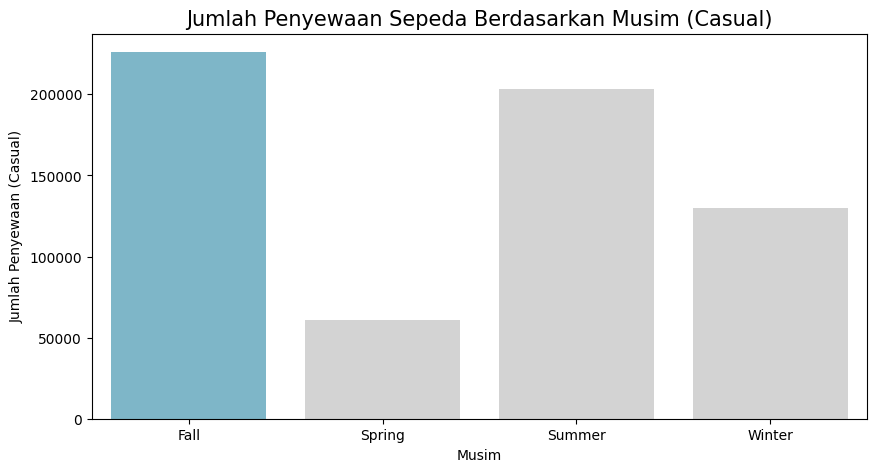

In [159]:
plt.figure(figsize=(10, 5))

colors_1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='season_x', y='casual_x', data=merge_casual, palette=colors_1)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim (Casual)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan (Casual)')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Pelanggan yang Berlangganan (Regsitered)

In [135]:
merge_registered = all_data.groupby('season_x').agg({
    'registered_x': 'sum'
})

<ipython-input-135-26e2f15afd2b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_registered = all_data.groupby('season_x').agg({


<ipython-input-160-3709934d5ba1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


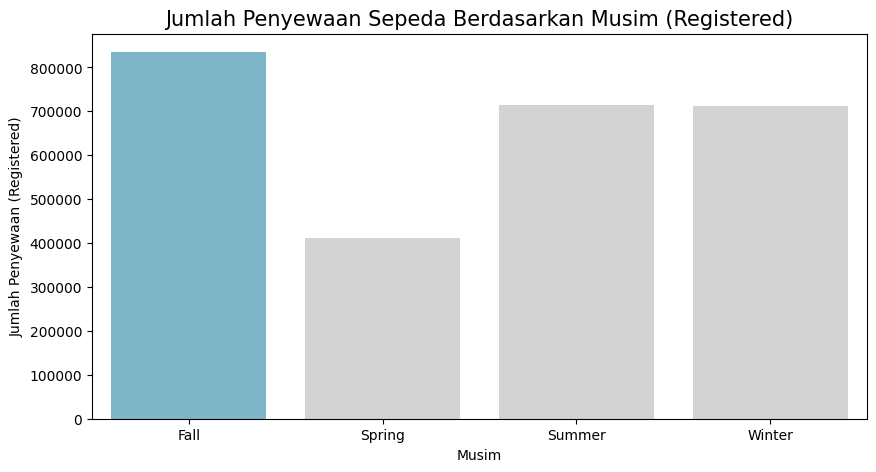

In [160]:
plt.figure(figsize=(10, 5))

colors_1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='season_x',
    y='registered_x',
    data=merge_registered,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim (Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan (Registered)')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Total Gabungan Casual & Regsitered

In [137]:
merge_cnt = all_data.groupby('season_x').agg({
    'cnt_x': 'sum'
})

<ipython-input-137-54cb00c30f1e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_cnt = all_data.groupby('season_x').agg({


<ipython-input-161-94031d6287a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


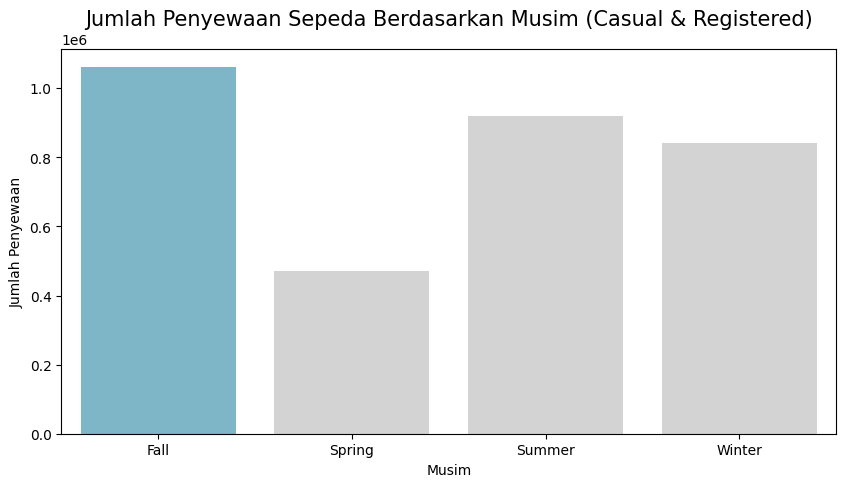

In [161]:
plt.figure(figsize=(10, 5))

colors_1 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='season_x',
    y='cnt_x',
    data=merge_cnt,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim (Casual & Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2: Pada bulan apa jumlah sepeda yang disewa mencapai angka tertinggi berdasarkan data sewa sepeda selama tahun 2011 - 2012?

Berdasarkan Pelanggan Biasa (Casual)

In [162]:
merge_casual_month = all_data.groupby('mnth_x').agg({
    'casual_x': 'sum'
})

<ipython-input-163-3989bc47664d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


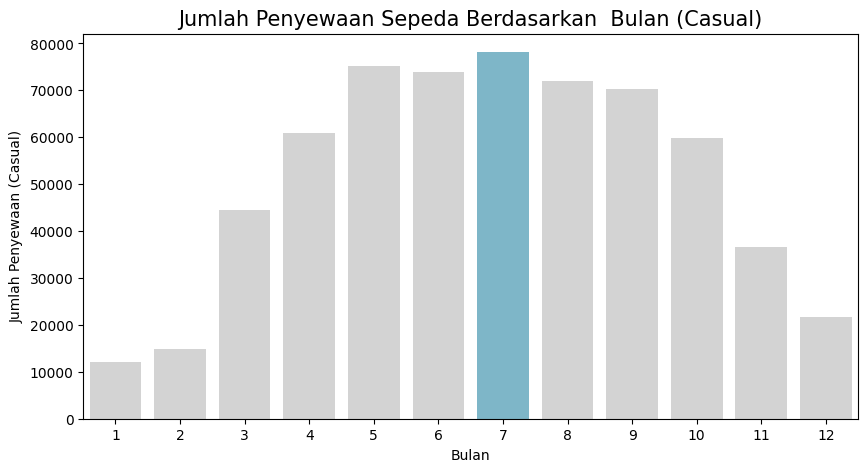

In [163]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='mnth_x',
    y='casual_x',
    data=merge_casual_month,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Bulan (Casual)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan (Casual)')
plt.xlabel('Bulan')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Pelanggan yang Berlangganan (Registered)

In [141]:
merge_registered_month = all_data.groupby('mnth_x').agg({
    'registered_x': 'sum'
})

<ipython-input-142-a79dc3e0d4ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


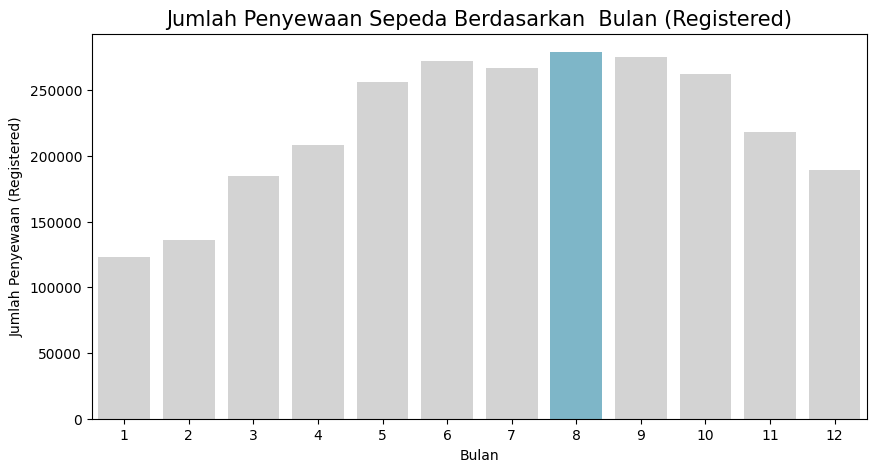

In [142]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='mnth_x',
    y='registered_x',
    data=merge_registered_month,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Bulan (Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan (Registered)')
plt.xlabel('Bulan')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Total Gabungan (Casual & Regsitered)

In [143]:
merge_cnt_month = all_data.groupby('mnth_x').agg({
    'cnt_x': 'sum'
})

<ipython-input-144-c6aeedd78034>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


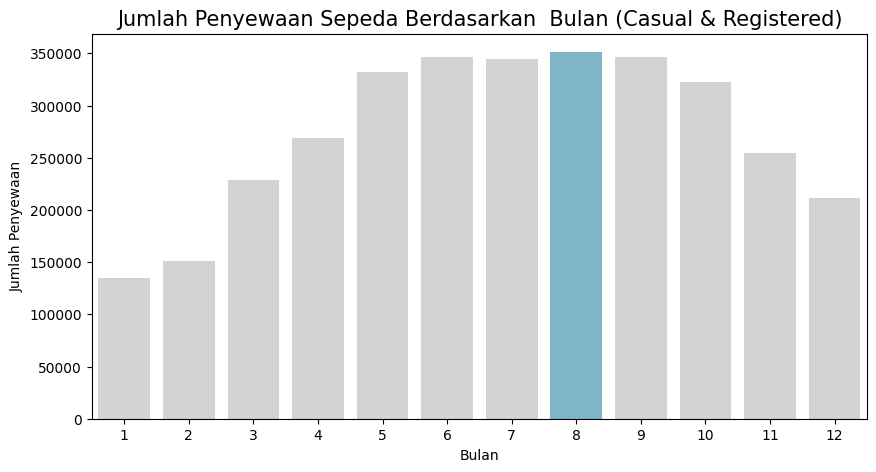

In [144]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='mnth_x',
    y='cnt_x',
    data=merge_cnt_month,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Bulan (Casual & Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Bulan')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 3: Pada jam berapa jumlah sepeda yang disewa mencapai angka tertinggi dalam sehari, berdasarkan data sewa sepeda selama tahun 2011 - 2012?

Berdasarkan Pelanggan Biasa (Casual)

In [145]:
merge_hr_casual = all_data.groupby('hr').agg({
    'casual_y': 'sum',
})

<ipython-input-146-0965f5451f7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-146-0965f5451f7c>:4: UserWarning: 
The palette list has fewer values (22) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


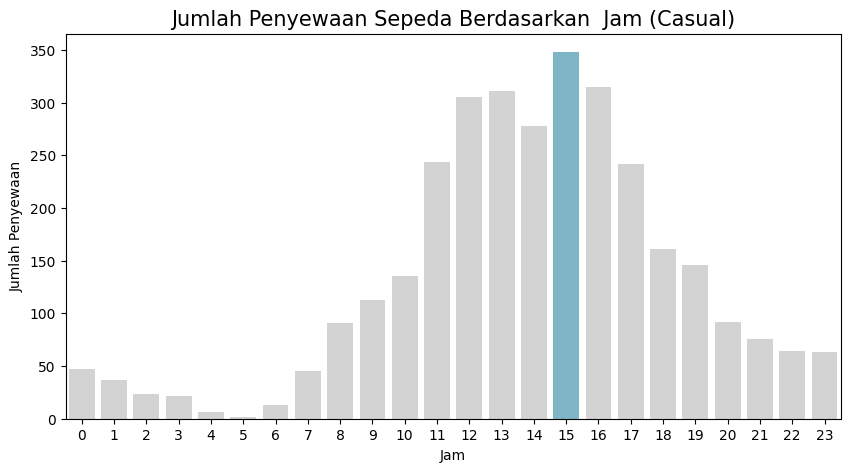

In [146]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='hr',
    y='casual_y',
    data=merge_hr_casual,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Jam (Casual)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Jam')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Pelanggan yang Berlangganan (Registered)

In [147]:
merge_hr_registered = all_data.groupby('hr').agg({
    'registered_y': 'sum',
})

<ipython-input-148-7d7b565a2a58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-148-7d7b565a2a58>:4: UserWarning: 
The palette list has fewer values (22) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


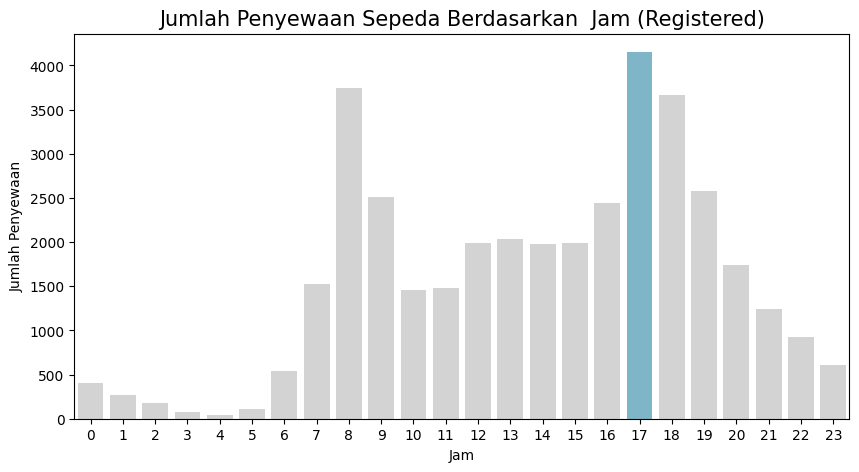

In [148]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='hr',
    y='registered_y',
    data=merge_hr_registered,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Jam (Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Jam')
plt.xticks(rotation=0)
plt.show()

Berdasarkan Total Gabungan (Casual & Registered)

In [149]:
merge_hr_cnt = all_data.groupby('hr').agg({
    'cnt_y': 'sum',
})

<ipython-input-150-dc0e2ed24e43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-150-dc0e2ed24e43>:4: UserWarning: 
The palette list has fewer values (22) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


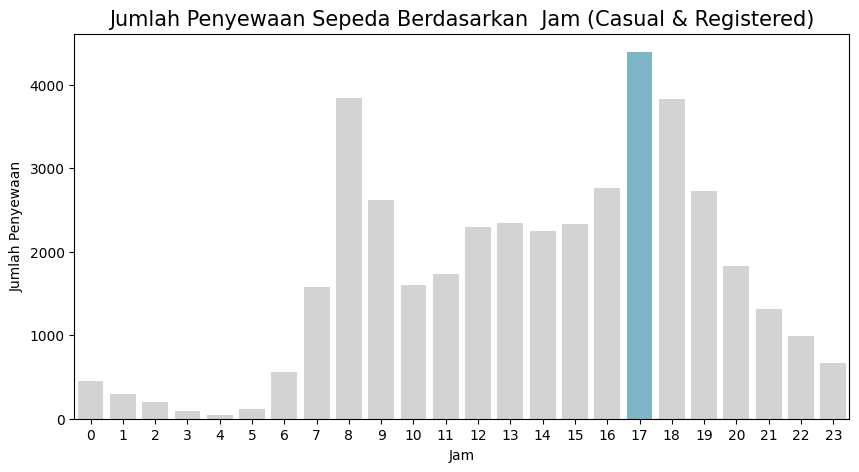

In [150]:
plt.figure(figsize=(10, 5))

colors_1 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x='hr',
    y='cnt_y',
    data=merge_hr_cnt,
    palette=colors_1
)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan  Jam (Casual & Registered)', loc='center', fontsize=15)
plt.ylabel('Jumlah Penyewaan')
plt.xlabel('Jam')
plt.xticks(rotation=0)
plt.show()

In [151]:
all_data.to_csv('all_data.csv', index=False)

## Conclusion

### Kesimpulan dari Pertanyaan 1

Berdasarkan data dan visualisasi data dari pertanyaan pertama, dapat diketahui bahwa sewa sepeda untuk pelanggan biasa (casual), pelanggan yang berlangganan (registered), dan gabungan dari keduanya berdasarkan musim, paling banyak terjadi di musim ke - 3 atau di musim gugur/fall

### Kesimpulan dari Pertanyaan 2

Berdasarkan data dan visualisasi data dari pertanyaan kedua, dapat diketahui bahwa sewa sepeda untuk pelanggan biasa (casual) berdasarkan bulan, paling banyak terjadi di bulan ke - 7. Untuk pelanggan yang berlangganan (registered) paling banyak terjadi di bulan ke - 8. Begitu juga untuk gabungan dari keduanya, paling banyak terjadi di bulan ke - 8

### Kesimpulan dari Pertanyaan 3

Berdasarkan data dan visualisasi data dari pertanyaan ketiga, dapat diketahui bahwa sewa sepeda untuk pelanggan biasa (casual) berdasarkan jam, paling banyak terjadi di jam 15 atau jam 3 sore. Untuk pelanggan yang berlangganan (registered) paling banyak terjadi di jam 17 atau jam 5 sore. Begitu juga untuk gabungan dari keduanya, paling banyak terjadi di jam 17 atau jam 5 sore

### catatan: jumlah data pada exploratory, visualization & explanatory merupakan gabungan dari jumlah di tahun 0 (2011) dengan tahun 1 (2012)